In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
base_iris = pd.read_csv(r"C:\Users\felip\OneDrive\Área de Trabalho\base_iris.csv", sep = ';')

In [5]:
base_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

In [61]:
base_iris

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
base_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
X_petala = base_iris.iloc[:, [2,3]].values
X_petala[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [27]:
normalizar_dados = StandardScaler()
X_petala = normalizar_dados.fit_transform(X_petala)
X_petala[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

In [33]:
wcss_petala = []
for i in range(1,11):
    kmeans_petala = KMeans(n_clusters = i, random_state=0)
    kmeans_petala.fit(X_petala)
    wcss_petala.append(kmeans_petala.inertia_)

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [39]:
for i in range(len(wcss_petala)):
    print('Cluster:', i, ' - Valor do WCSS:', wcss_petala[i] )

Cluster: 0  - Valor do WCSS: 299.99999999999994
Cluster: 1  - Valor do WCSS: 54.14584701344989
Cluster: 2  - Valor do WCSS: 18.046983891906272
Cluster: 3  - Valor do WCSS: 12.307440251261843
Cluster: 4  - Valor do WCSS: 9.181131495513899
Cluster: 5  - Valor do WCSS: 7.215096212730808
Cluster: 6  - Valor do WCSS: 6.026593155951447
Cluster: 7  - Valor do WCSS: 5.17331521891538
Cluster: 8  - Valor do WCSS: 4.419290104197289
Cluster: 9  - Valor do WCSS: 3.913941783054321


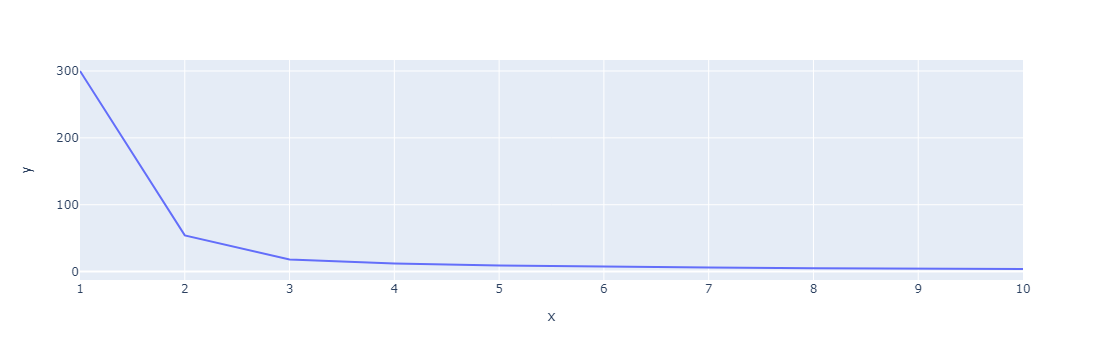

In [53]:
grafico_cotovelo_petala = px.line(x = range(1,11), y = wcss_petala)
grafico_cotovelo_petala.update_layout(width = 500, height = 300)
grafico_cotovelo_petala.show()

In [57]:
kmeans_petala = KMeans(n_clusters = 3, random_state = 0)
label_cluster_petala = kmeans_petala.fit_predict(X_petala)

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [59]:
label_cluster_petala

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
centroides_petala = kmeans_petala.cluster_centers_
centroides_petala

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

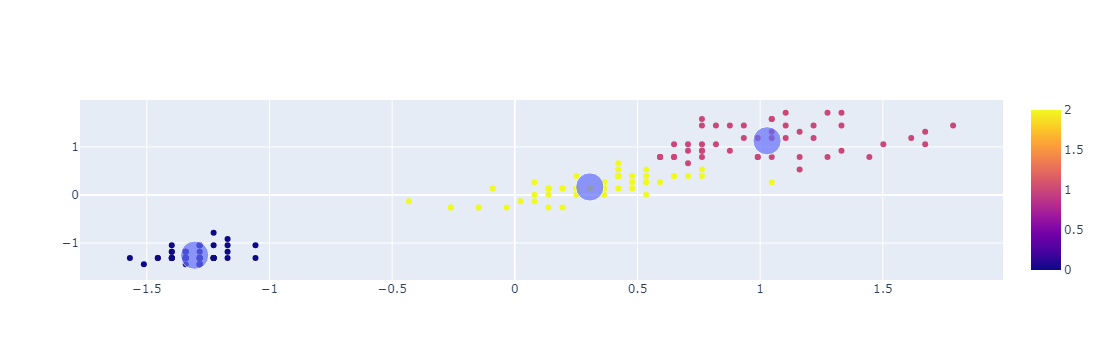

In [75]:
grafico_petala = px.scatter(x = X_petala[:,0], y = X_petala[:,1], color = label_cluster_petala)
grafico_centroide = px.scatter(x = centroides_petala[:,0], y = centroides_petala[:,1], size = [7, 7, 7] )
grafico_final_petala = go.Figure(data = grafico_petala.data + grafico_centroide.data)
grafico_final_petala.show()

In [101]:
X_sepala = base_iris.iloc[:, [0,1]].values
X_sepala[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

In [103]:
wcss_sepala = []
for i in range(1,11):
    kmeans_sepala = KMeans(n_clusters = i, random_state=0)
    kmeans_sepala.fit(X_sepala)
    wcss_sepala.append(kmeans_sepala.inertia_)

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\fel

In [105]:
for i in range(len(wcss_sepala)):
    print('Cluster:', i, ' - Valor do WCSS:', wcss_sepala[i] )

Cluster: 0  - Valor do WCSS: 130.18093333333334
Cluster: 1  - Valor do WCSS: 57.98240604207877
Cluster: 2  - Valor do WCSS: 37.12370212765957
Cluster: 3  - Valor do WCSS: 27.982542817358613
Cluster: 4  - Valor do WCSS: 20.971913367009606
Cluster: 5  - Valor do WCSS: 17.23869523809524
Cluster: 6  - Valor do WCSS: 14.63190960705961
Cluster: 7  - Valor do WCSS: 12.911711915446569
Cluster: 8  - Valor do WCSS: 11.178960061443933
Cluster: 9  - Valor do WCSS: 9.449454365079365


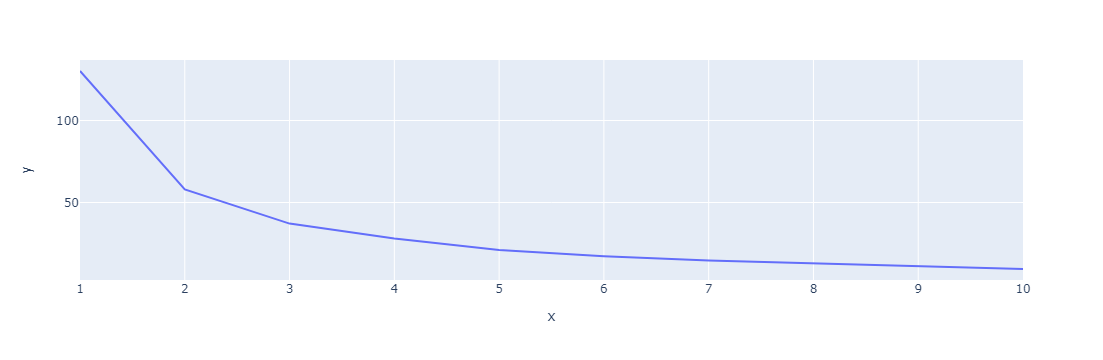

In [107]:
grafico_cotovelo_sepala = px.line(x = range(1,11), y = wcss_sepala)
grafico_cotovelo_sepala.update_layout(width = 500, height = 300)
grafico_cotovelo_sepala.show()

In [109]:
kmeans_sepala = KMeans(n_clusters = 3, random_state = 0)
label_cluster_sepala = kmeans_sepala.fit_predict(X_sepala)

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\felip\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [111]:
label_cluster_sepala

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [113]:
centroides_sepala = kmeans_sepala.cluster_centers_
centroides_sepala

array([[5.77358491, 2.69245283],
       [5.006     , 3.418     ],
       [6.81276596, 3.07446809]])

In [ ]:
grafico_sepala = px.scatter(x = X_sepala[:,0], y = X_sepala[:,1], color = label_cluster_setala)
grafico_centroide = px.scatter(x = centroides_sepala[:,0], y = centroides_sepala[:,1], size = [7, 7, 7] )
grafico_final_petala = go.Figure(data = grafico_sepala.data + grafico_centroide.data)
grafico_final_petala.show()